In [1]:
import os
import cv2
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from ObjectDetection import ObjectDetection

In [2]:
def printImgCol(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
    
def printImgGray(img):
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.show()

In [3]:
img = cv2.imread('image_1_2.png',1)

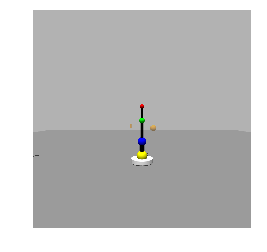

(800, 800, 3)


In [4]:
printImgCol(img)
print(img.shape)

In [5]:
od = ObjectDetection()

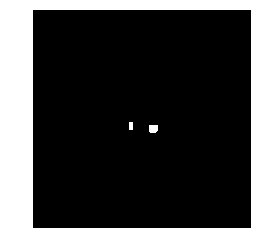

In [6]:
img2 = od.filter_orange(img)
printImgGray(img2)

In [14]:
rects, cnts = od.find_boundries(img2)

In [15]:
rects

[(424, 421, 34, 29), (351, 412, 16, 27)]

In [16]:
cx0, cy0 = od.get_center(img2, rects[0])
cx1, cy1 = od.get_center(img2, rects[1])
print(cx0, cy0)
print(cx1, cy1)

441 435
359 426


In [10]:
#cv2.circle(img2, (cx0, cy0), 1, (125), 1)
#cv2.circle(img2, (cx1, cy1), 1, (125), 1)
#cv2.imwrite('sheep1.jpg', img2)

In [19]:
obj1 = od.get_object(img2, rects[0])
obj2 = od.get_object(img2, rects[1])

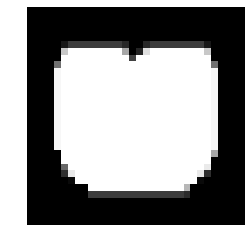

In [12]:
printImgGray(obj1)

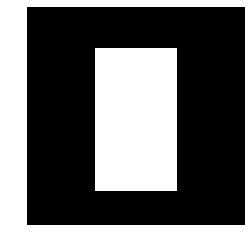

In [20]:
printImgGray(obj2)

In [24]:
print(cv2.contourArea(cnts[0]))
print(cv2.contourArea(cnts[1]))

860.5
390.0


In [27]:
print(cv2.isContourConvex(cnts[0]))
print(cv2.isContourConvex(cnts[1]))

False
True


In [28]:
print(cv2.minAreaRect(cnts[0]))
print(cv2.minAreaRect(cnts[1]))

((440.5, 435.0), (33.0, 28.0), -0.0)
((358.5, 425.0), (26.0, 15.0), -90.0)


In [29]:
print(cv2.arcLength(cnts[0], True))
print(cv2.arcLength(cnts[1], True))

116.87005698680878
82.0


In [ ]:
ci1 = np.real(c11)
ci2 = np.real(1000 * c21 * c12)

In [31]:
M1 = cv2.moments(obj1)
M2 = cv2.moments(obj2)

In [32]:
M1["m10"]

1891733.0

In [33]:
M1

{'m00': 121714.0,
 'm01': 1911633.0,
 'm02': 34283529.0,
 'm03': 673275759.0,
 'm10': 1891733.0,
 'm11': 29747465.0,
 'm12': 534129893.0,
 'm20': 34701171.0,
 'm21': 543182347.0,
 'm30': 703884131.0,
 'mu02': 4259532.3628917,
 'mu03': 1020713.1400290728,
 'mu11': 36016.60467160866,
 'mu12': 148722.17467665672,
 'mu20': 5299017.235527553,
 'mu21': -2951797.153125152,
 'mu30': -176222.47926676273,
 'nu02': 0.0002875284688850938,
 'nu03': 1.9749330034518364e-07,
 'nu11': 2.4312056614207846e-06,
 'nu12': 2.8775600077578352e-08,
 'nu20': 0.0003576961465536582,
 'nu21': -5.711302606563871e-07,
 'nu30': -3.409651317353707e-08}

In [32]:
area = sum(obj1.ravel())
print(area)
perim = bwperim(obj1)
print(perim)
compactness = perim * perim / (4.0 * np.pi * area)
    
c11 = complexmoment(obj1, 1, 1) / np.power(area, 2)
ci1 = np.real(c11)

print(compactness)
print(c11)
print(ci1)

121714
0.0
0.0
(2.507671646134159e-07+0j)
2.507671646134159e-07


In [29]:
def bwperim(img):
    img = np.array(img)
    height, width = np.shape(img)
    perim_img = np.zeros([height, width])
    for row in range(height):
        for col in range(width):
            if row == 0 or row == height - 1 or col == 0 or col == width - 1:
                if img[row][col] == 1:
                    perim_img[row][col] = 1
            else:
                if img[row][col] == 1 and (
                        img[row][col + 1] == 0 or img[row + 1][col + 1] == 0 or img[row + 1][col] == 0 or img[row + 1][
                    col - 1] == 0 or img[row][col - 1] == 0 or img[row - 1][col - 1] == 0 or img[row - 1][col] == 0 or
                        img[row - 1][col + 1] == 0):
                    perim_img[row][col] = 1
    # Uncomment the next two lines if you want to see the perimeter
    # cv2.imshow("perim image",perim_img)
    # cv2.waitKey(5)
    return sum(perim_img.ravel())

In [31]:
# Returns a given complex moment
def complexmoment(img, u, v):
    img = np.array(img)
    indices = np.argwhere(img > 0)
    centre = np.mean(indices, 0)

    momlist = np.zeros(np.shape(indices)[0], dtype=complex)
    for i in indices:
        c1 = i[0] - centre[0] + (i[1] - centre[1]) * 1j
        c2 = i[0] - centre[0] + (centre[1] - i[1]) * 1j
        momlist[i] = np.power(c1, u) * np.power(c2, v)

    return sum(momlist)